In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
dataset=pd.ExcelFile("C:/Users/NagarjunaPujala/Downloads/python_hackathon/V02Max_Combined.xlsx")

In [5]:
Athletes=pd.read_excel(dataset, sheet_name='Athletes')
Kayaking=pd.read_excel(dataset, sheet_name='Kayaking')
Triathlon=pd.read_excel(dataset, sheet_name='Triathlon')
Fencing=pd.read_excel(dataset, sheet_name='Fencing')

C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [7]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
print(combined)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]


In [9]:
merged=pd.merge(combined,Athletes,on='ID')
print(merged)

       ID     time     RR       VO2  power  age  Weight  Height  P_vt1  P_vt2  \
0      11 -168.600  727.0  0.287147      0   18    84.8     182    174    268   
1      11 -167.872  728.0  0.287147      0   18    84.8     182    174    268   
2      11 -167.148  724.0  0.287147      0   18    84.8     182    174    268   
3      11 -166.484  664.0  0.320580      0   18    84.8     182    174    268   
4      11 -165.836  648.0  0.320580      0   18    84.8     182    174    268   
...    ..      ...    ...       ...    ...  ...     ...     ...    ...    ...   
52057  10  942.700  428.0  0.786363      0   14    58.8     177    101    162   
52058  10  943.124  424.0  0.786363      0   14    58.8     177    101    162   
52059  10  943.552  428.0  0.786363      0   14    58.8     177    101    162   
52060  10  943.976  424.0  0.786363      0   14    58.8     177    101    162   
52061  10  944.404  428.0  0.786363      0   14    58.8     177    101    162   

         sport  Gender Ethn

#### 65.Query:
   [ 1,  2,  3,  4,  5],
   [ 6,  7,  8,  9, 10],
   [11, 12, 13, 14, 15],
   [16, 17, 18, 19, 20],
   [21, 22, 23, 24, 25],
   [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.

In [14]:
# solution:
fived_array=np.array([ [ 1,  2,  3,  4,  5],
   [ 6,  7,  8,  9, 10],
   [11, 12, 13, 14, 15],
   [16, 17, 18, 19, 20],
   [21, 22, 23, 24, 25],
   [26, 27, 28, 29, 30] ])
print(fived_array[0][3],",",fived_array[1][1],",",fived_array[1][4],",",fived_array[3][1])

4 , 7 , 10 , 17


#### 66.Query: On average, how long did each participant spend at 200 watts?¶

In [97]:
#solution:
#giving condition to filter participants for power 200 watts
df = combined.loc[combined['power'] == 200]
#finding the total time of each participants
result=df.groupby(['ID'])['time'].max()-df.groupby(['ID'])['time'].min()
#finding number of unique ids present
A=len(pd.unique(combined['ID']))
#printing average time  of each participant
print(result/A)

ID
3     3.247333
4     3.313333
5     3.282667
6     3.278444
9     0.301111
10    1.753778
11    3.312000
12    3.254889
13    3.374667
14    3.315778
15    3.319333
16    3.314444
18    1.465333
Name: time, dtype: float64


#### 67.Query:Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [162]:
#solution:
sum_vo2=merged.groupby(['ID'])['VO2'].sum()
#df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
for index,row in df1.iterrows():
     merged.at[index,'max_vo2']=round(merged.at[index,'VO2']/merged.at[index,'Weight'],2)
     df1=merged.groupby('sport')['max_vo2'].mean()
print(df1.idxmax(),"sport had the highest average cardiorespiratory fitness in terms of vo2 max with value:",df1.max())

triathlon sport had the highest average cardiorespiratory fitness in terms of vo2 max with value: 0.03111222646055009


#### 68.Query: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [57]:
#solution:
merged['HR']= (60000/merged['RR']).round(2)
R_11= merged.groupby(['sport','ID'])['HR'].max()
df1=pd.merge(R_11,Athletes,on='ID',how='inner')[['ID','HR','sport','age']]
for index,row in df1.iterrows():
    df1['max_HR']= abs(df1['age'].subtract(220))
df1.loc[df1['HR']>0.9*df1['max_HR'],"solution"]="Exceeds 90%"
df1.loc[df1['HR']<=0.9*df1['max_HR'],"solution"]="not Exceeds 90%"
print(df1['solution'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%')

solution
Exceeds 90%        94.44%
not Exceeds 90%     5.56%
Name: proportion, dtype: object


#### 69.Query:What was the lowest heart rate recorded at a power wattage of 200


In [77]:
#solution:
df = merged.loc[merged['power'] == 200]
print(df[['HR']].min(),"was the lowest heart rate recorded at a power wattage of 200")

HR    71.77
dtype: float64 was the lowest heart rate recorded at a power wattage of 200


#### 70.Query: On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [130]:
#solution:
merged['75%Max_HR']=round(merged['Max_HR']*0.75,0)
df1=merged.loc[merged['75%Max_HR']==merged['HR']].reset_index()
df2=df1.groupby('ID')['time'].max()-df1.groupby('ID')['time'].min()
df2.mean()

515.1886666666667

#### 71.Query: Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [128]:
merged.loc[(merged['HR']<=100),"HR ZONE"]="ZONE_1"    
merged.loc[(merged['HR']>=100) & (merged['HR']<=120),"HR ZONE"]="ZONE_2"
merged.loc[(merged['HR']>=120) & (merged['HR']<=135),"HR ZONE"]="ZONE_3"
merged.loc[(merged['HR']>=135) & (merged['HR']<=155),"HR ZONE"]="ZONE_4"
merged.loc[(merged['HR']>=155) ,"HR ZONE"]="ZONE_5"
#sol as per query
result = pd.crosstab(merged['sport'], merged['HR ZONE'])
print(result)


HR ZONE    ZONE_1  ZONE_2  ZONE_3  ZONE_4  ZONE_5
sport                                            
fencing      2258    3433    4269    5833   11810
kayak        1456    2621    3434    4127    7128
triathlon     464     318    1089     813    1861


#### 72.Query: Provide an example of a lambda function that multiplies any 2 input values.

In [121]:
#solution:
multi=lambda X,Y:X*Y
X = float(input('Enter X value: '))
Y = float(input('Enter Y value: '))
result = multi(X, Y)
print("The multipliaction of the X & Y values:", result)

Enter X value:  20
Enter Y value:  30


The multipliaction of the X & Y values: 600.0


#### 73.Query:How long was athlete 17s warm up


In [124]:
#solution:
df1=merged.loc[(merged['time']<=0)&(merged['ID']==17)].reset_index()
df2=df1['time'].max()-df1['time'].min()
print(df2,"Seconds long was athlete 17s warm up")

182.408 Seconds long was athlete 17s warm up


#### 74 Query: Take a students full name and reverse it using a for loop

In [138]:
#solution:
Athletes['full_name'] = Athletes['First Name'] + ' ' + Athletes['Last Name']
reverse_list=[]
for names in Athletes['full_name']:
    reverse_name=""
    for char in names:
         reverse_name= char + reverse_name
    reverse_list.append(reverse_name)
Athletes['reverse']=reverse_list     
print(Athletes[['ID','full_name','reverse']])     

    ID         full_name           reverse
0    1   Olivia Martinez   zenitraM aivilO
1    2    Ethan Reynolds    sdlonyeR nahtE
2    3    Jackson Harper    repraH noskcaJ
3    4      Liam Sanchez      zehcnaS maiL
4    5      Ava Thompson      nospmohT avA
5    6  Sophia Rodriguez  zeugirdoR aihpoS
6    7     Grace Simmons     snommiS ecarG
7    8     Aiden Bennett     ttenneB nediA
8    9       Chloe Price       ecirP eolhC
9   10       Lily Jordan       nadroJ yliL
10  11  Isabella Griffin  niffirG allebasI
11  12       Caleb Dixon       noxiD belaC
12  13     Mia Carpenter     retnepraC aiM
13  14   Harper Mitchell   llehctiM repraH
14  15     Mason Wallace     ecallaW nosaM
15  16    Logan Anderson    nosrednA nagoL
16  17      Lucas Foster      retsoF sacuL
17  18        Owen Myers        sreyM newO


#### 75 Query:What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [146]:
#solution:
df1=pd.merge(combined,Athletes,on='ID',how='inner')[['ID','full_name','sport','HR']]
df2=df1.loc[(df1['HR']==df1['HR'].max())].reset_index()
print(df2)


   index  ID      full_name    sport     HR
0  44041   7  Grace Simmons  fencing  238.0


#### 76 Query: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [149]:
#solution:
x= np.arange(1,31).reshape(6,5)
print(x)
print(x[0][1],",",x[0][4],",",x[2][2],",",x[4][4],",",x[5][4])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
2 , 5 , 13 , 25 , 30


#### 77 Query: Display a violin chart to show distribution of VO2Max against age.

KeyError: 'max_vo2'

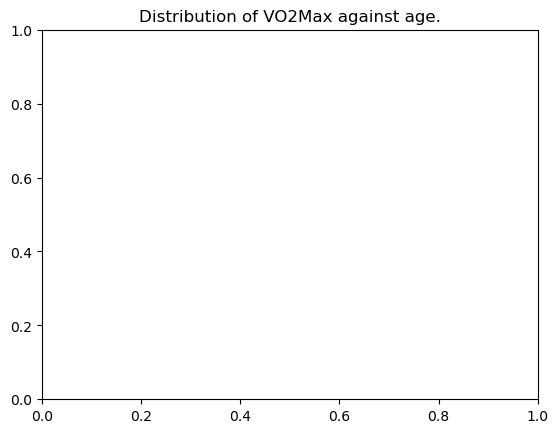

In [158]:
#solution:
#sum_vo2=All_sports.groupby(['sport','ID'])['VO2'].sum()
#df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','age','VO2','sport','Weight']]
#for index,row in df1.iterrows():
   #   df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
plt.title("Distribution of VO2Max against age.")
sns.violinplot(x=merged['age'],y=merged['max_vo2'],hue=merged['age'],palette="RdPu",data=df1) 

In [163]:
#### 78.

In [164]:
#solution:

#### 79 Query: Plot the Donut chart athlete distrubution by Gender

In [ ]:
#solutiuon:#solution:
gender=(Athletes['Gender']).value_counts()
x=('female 10','male 8')
plt.title("Distrubution by Gender")
plt.pie(gender,autopct = '%0.2f%%',labels=x,pctdistance=0.85,explode=(0.02, 0.02))
my_circle=plt.Circle((0,0),0.6,color='white')
plt.gca().add_artist(my_circle) and plt.show()

#### 80 Query:find the size of a Tuple for any given input

In [ ]:
#solution:(80 Q)
#for integer input
result_tuple = tuple(int(item) for item in (input('Enter integers: ')).split())
print(result_tuple)
print(len(result_tuple),"is the tuple length of given input" )

In [ ]:
# for any input(80 Q)
result_tuple = tuple((input('Enter integers: ')).split())
print(result_tuple)
print(len(result_tuple),"is the tuple length of given input" )